We are interested in the loadings of the latent dimensions in the various integrated cell models. 

The variation in the latent dimensions for B-VAEs should vary on the task, whereas the latent dimensions in the AAE models should be uniform in variation

/opt/conda/envs/pytorch-py3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


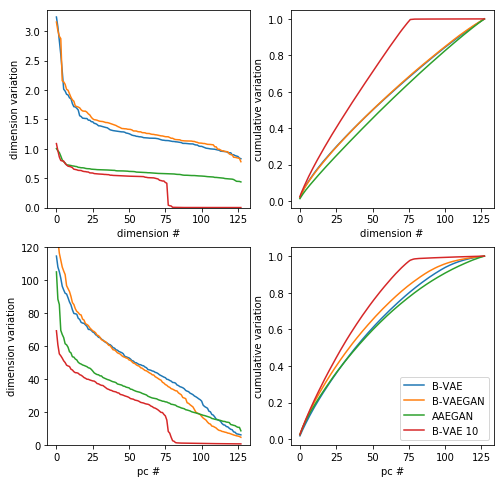

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA


model_dict = {'B-VAE': '/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-07-07-17:37:42',
             'B-VAEGAN': '/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvaegan/2018-07-12-20:54:37',
             'AAEGAN': '/root/allen/aics/modeling/gregj/results/integrated_cell/test_aaegan/2018-07-13-22:33:39',
             'B-VAE 10': '/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-07-25-22:11:39'}


def plot_dim_variation(embeddings, legend_name = None):
    var_dims = np.sort(np.var(embeddings.numpy(), axis=0))[::-1]

    pca = PCA()
    pca.fit(embeddings)
    pca_var_dims = pca.singular_values_
    

    plt.subplot(2, 2, 1)
    plt.plot(var_dims, label=legend_name)
    plt.xlabel('dimension #')
    plt.ylabel('dimension variation')
    plt.ylim(0)

    plt.subplot(2, 2, 2)
    plt.plot(np.cumsum(var_dims)/np.sum(var_dims), label=legend_name)
    plt.xlabel('dimension #')
    plt.ylabel('cumulative variation')
    
    plt.subplot(2, 2, 3)
    plt.plot(pca_var_dims, label=legend_name)
    plt.xlabel('pc #')
    plt.ylabel('dimension variation')
    plt.ylim(0)

    plt.subplot(2, 2, 4)
    plt.plot(np.cumsum(pca_var_dims)/np.sum(pca_var_dims), label=legend_name)
    plt.xlabel('pc #')
    plt.ylabel('cumulative variation')
    plt.legend()
    
plt.figure(figsize=(8, 8))    

for name in model_dict:
    model_path = model_dict[name]
    embeddings = torch.load(os.path.join(model_path, 'ref_model/embeddings.pkl'))
    plot_dim_variation(embeddings['test'], legend_name = name)



Results from integrated cell version of "Understanding disentangling in β-VAE"

We decrease the KL loss as a function of iteration

/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-08-15-18:38:06/
{'c_max': 100, 'c_iters_max': 250000.0, 'gamma': 1000, 'objective': 'B'}{'betas': [0.9, 0.999]}


/opt/conda/envs/pytorch-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


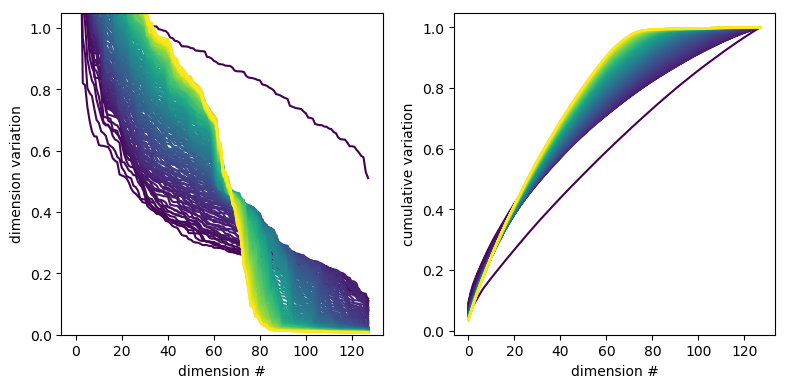

/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-08-15-18:23:43/
{'c_max': 50, 'c_iters_max': 200000.0, 'gamma': 1000, 'objective': 'B'}{'betas': [0.9, 0.999]}


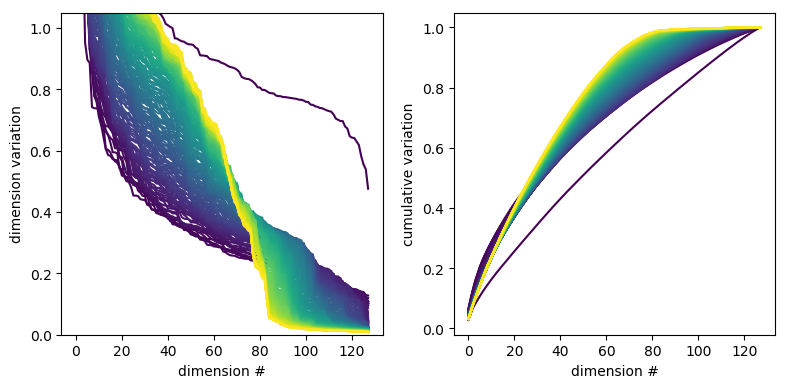

/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-08-09-05:21:40/
{'c_max': 25, 'c_iters_max': 200000.0, 'gamma': 1000, 'objective': 'B'}{'betas': [0.9, 0.999]}


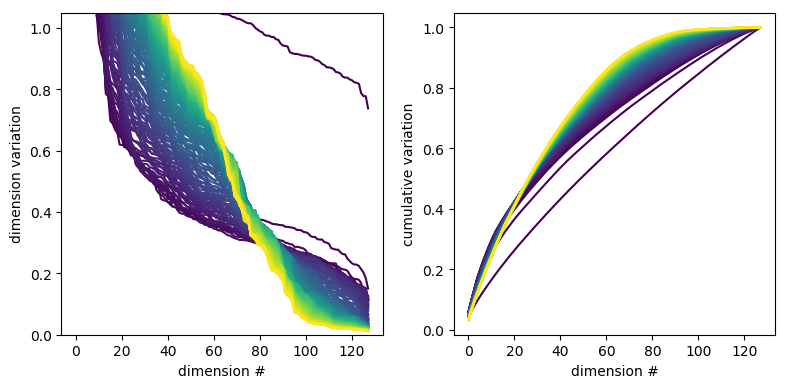

/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-08-09-05:05:16/
{'c_max': 25, 'gamma': 1000, 'objective': 'B'}{'betas': [0.9, 0.999]}


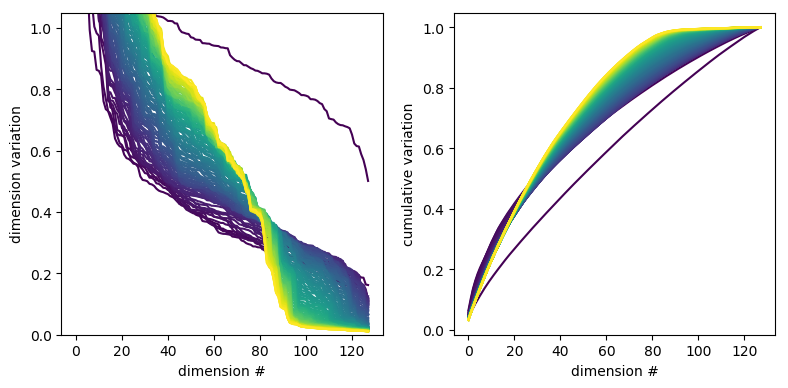

/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-08-08-21:44:44/
{'c_max': 25, 'gamma': 2500, 'objective': 'B'}{'betas': [0.9, 0.999]}


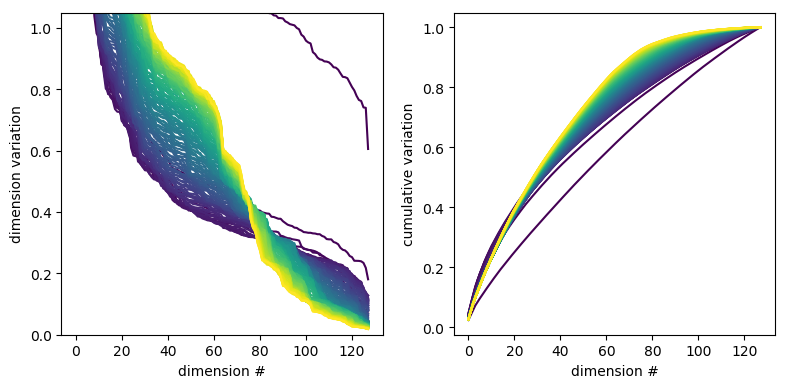

/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-08-07-15:37:56/
{'c_max': 25, 'gamma': 1000, 'objective': 'B'}{'betas': [0.9, 0.999]}


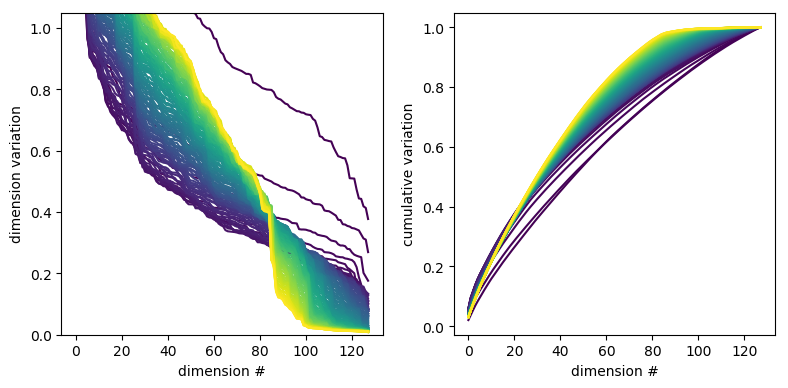

/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-08-06-18:33:27/
{'c_max': 25, 'gamma': 25000.0, 'objective': 'B'}{'betas': [0.9, 0.999]}


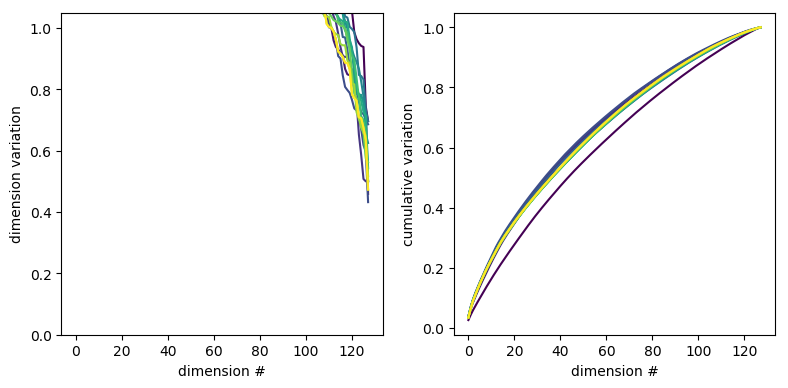

/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/2018-08-01-19:12:51/
{'beta': 25, 'objective': 'B'}{'betas': [0.9, 0.999]}


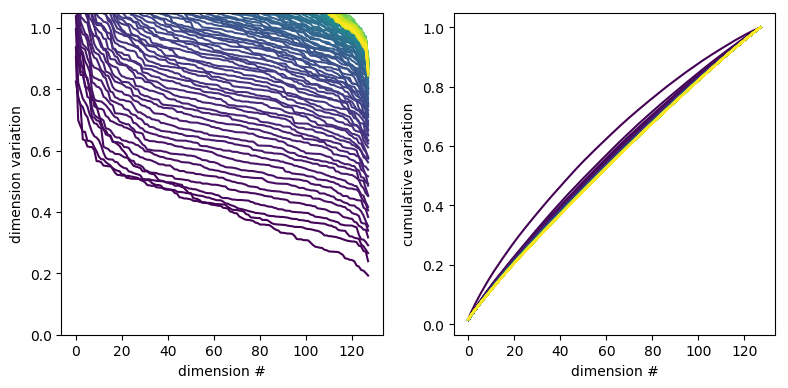

In [3]:
import pdb
import os
import glob
from natsort import natsorted
from integrated_cell.utils.plots import embedding_variation
import pickle

from IPython.core.display import display
import PIL.Image
import scipy.misc as misc

# model_paths = glob.glob('/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvaegan/*/')
model_paths = glob.glob('/root/allen/aics/modeling/gregj/results/integrated_cell/test_bvae/*/')

model_paths.sort(key=os.path.getmtime, reverse=True)

# model = 'struct_model'
model = 'struct_model'

for i, model_path in enumerate(model_paths):
    embedding_paths = natsorted(glob.glob(os.path.join(model_path, model + '/embedding_*.pkl')))
    
    if len(embedding_paths) == 0: continue
    opt = pickle.load( open(os.path.join(model_path, model + '/opt.pkl'), "rb" ))

    if ('objective' in opt.kwargs_model) and (opt.kwargs_model['objective'] == 'B'):
        print(model_path)
        print(str(opt.kwargs_model) + str(opt.kwargs_optim))
        
        save_path = os.path.join(model_path, model + '/embedding_variation.png')
        
        embedding_variation(embedding_paths, save_path = save_path)
        
        im_embedding = misc.imread(save_path)        
        display(PIL.Image.fromarray(im_embedding))



In [53]:
embedding_paths

[]